## Energy-based Flow Classifier
Reference:
>_C. F. T. Pontes, M. M. C. de Souza, J. J. C. Gondim, M. Bishop and M. A. Marotta, A New Method for Flow-Based Network Intrusion Detection Using the Inverse Potts Model, in IEEE Transactions on Network and Service Management, vol. 18, no. 2, pp. 1125-1136, June 2021, doi: 10.1109/TNSM.2021.3075503._

https://efc-package.readthedocs.io/en/latest/quick_start.html

https://github.com/EnergyBasedFlowClassifier/EFC-package

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import efc as efc

/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
from efc import EnergyBasedFlowClassifier

# Loading silos

In [3]:
from os import listdir
from os.path import isfile, join
import pandas as pd

silos_path = "./datasets/silos/"
silos_files = [f for f in listdir(silos_path) if isfile(join(silos_path, f))]

silos = {}
for silo in silos_files:
    silo_name = silo.replace(".csv.gz", "")
    silos[silo_name] = pd.read_csv(silos_path + silo)

# Not applicable features

In [4]:
# Other candidates to be removed:
# ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'
#not_applicable_features = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 
#                           'L7_PROTO', 'Attack', 'Dataset'] # 'Label', 

#for _, silo in silos.items():
#    silo.drop(not_applicable_features, axis=1, inplace=True)

In [14]:
def preprocess(X):
    cols = X.select_dtypes(include=[np.float64]).columns
    X[cols] = X[cols].astype(np.float32)

    X.fillna(0, inplace=True)
    X.replace(np.inf, 9999, inplace=True)
    
    return X

# Evaluating EFC on Silos

In [15]:
%matplotlib inline

agent16.csv | cutoff = 982.9077216733418 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7114
           1       0.13      0.19      0.16       308

    accuracy                           0.92      7422
   macro avg       0.55      0.57      0.56      7422
weighted avg       0.93      0.92      0.92      7422



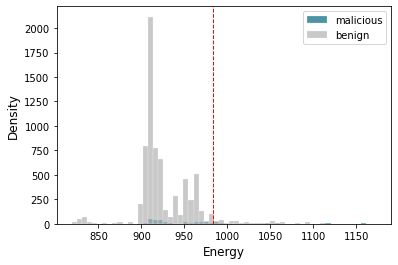

agent12.csv | cutoff = 950.2544187463238 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.18      0.94      0.30      9333
           1       1.00      0.98      0.99   2644645

    accuracy                           0.98   2653978
   macro avg       0.59      0.96      0.65   2653978
weighted avg       1.00      0.98      0.99   2653978



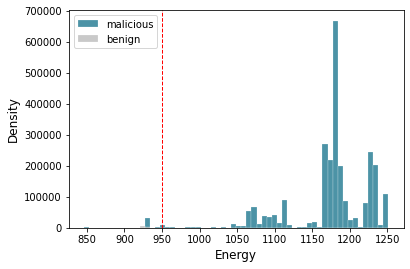

agent2.csv | cutoff = 1014.0687190033334 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7743

    accuracy                           1.00      7743
   macro avg       1.00      1.00      1.00      7743
weighted avg       1.00      1.00      1.00      7743



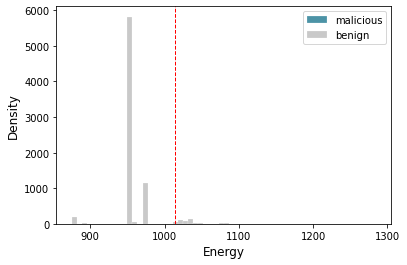

agent17.csv | cutoff = 991.729547603698 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      6319
           1       0.12      0.14      0.13       326

    accuracy                           0.91      6645
   macro avg       0.54      0.54      0.54      6645
weighted avg       0.91      0.91      0.91      6645



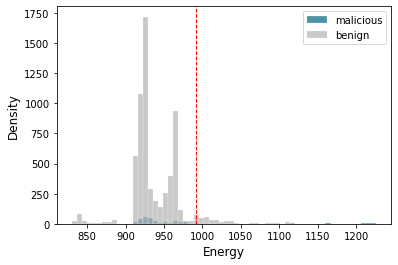

agent10.csv | cutoff = 940.0348387027029 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      1427
           1       1.00      1.00      1.00    324891

    accuracy                           1.00    326318
   macro avg       0.89      0.98      0.93    326318
weighted avg       1.00      1.00      1.00    326318



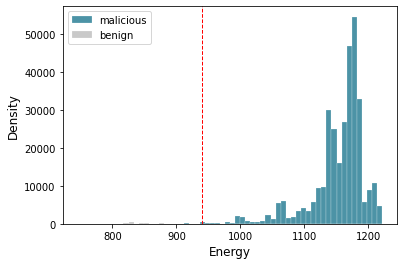

agent6.csv | cutoff = 948.6512579732648 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     77143
           1       0.79      1.00      0.89     28516

    accuracy                           0.93    105659
   macro avg       0.90      0.95      0.92    105659
weighted avg       0.94      0.93      0.93    105659



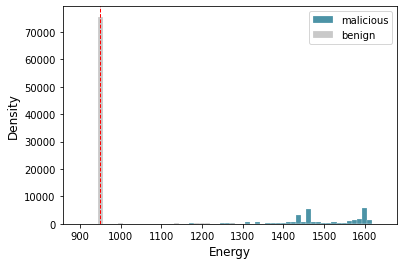

agent15.csv | cutoff = 995.4978503432205 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.07      0.94      0.13       956
           1       1.00      0.98      0.99    711539

    accuracy                           0.98    712495
   macro avg       0.53      0.96      0.56    712495
weighted avg       1.00      0.98      0.99    712495



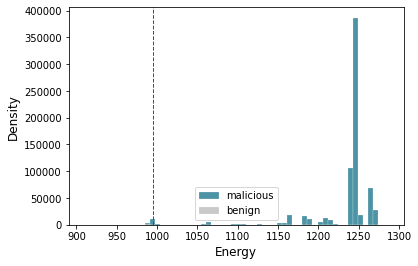

agent11.csv | cutoff = 936.340260304797 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.11      0.93      0.19       400
           1       1.00      0.97      0.98     92190

    accuracy                           0.97     92590
   macro avg       0.55      0.95      0.59     92590
weighted avg       1.00      0.97      0.98     92590



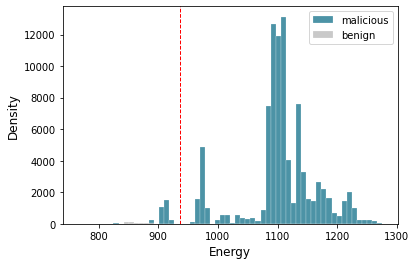

agent7.csv | cutoff = 1004.4100800571784 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     65102
           1       0.00      0.50      0.00         6

    accuracy                           0.95     65108
   macro avg       0.50      0.72      0.49     65108
weighted avg       1.00      0.95      0.97     65108



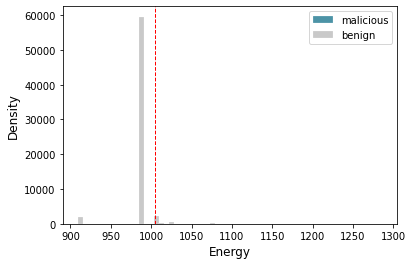

agent19.csv | cutoff = 982.9812255779701 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5779
           1       0.11      0.11      0.11       321

    accuracy                           0.91      6100
   macro avg       0.53      0.53      0.53      6100
weighted avg       0.91      0.91      0.91      6100



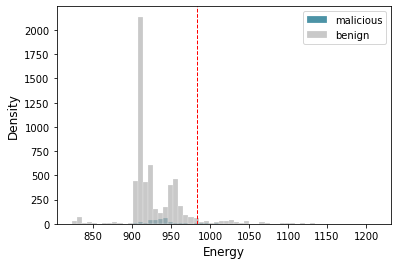

agent1.csv | cutoff = 1089.0927785025203 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     15813
           1       1.00      1.00      1.00    439743

    accuracy                           1.00    455556
   macro avg       0.98      0.97      0.98    455556
weighted avg       1.00      1.00      1.00    455556



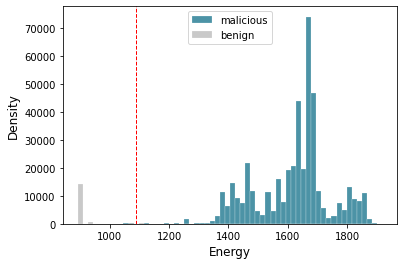

agent3.csv | cutoff = 941.7972668895848 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     68540
           1       0.96      1.00      0.98     91690

    accuracy                           0.98    160230
   macro avg       0.98      0.97      0.98    160230
weighted avg       0.98      0.98      0.98    160230



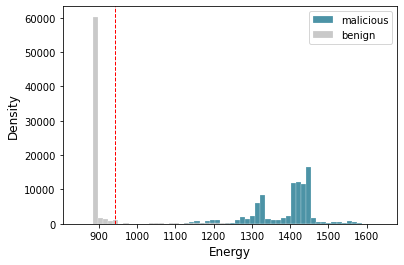

agent9.csv | cutoff = 914.551073976052 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       428
           1       0.96      1.00      0.98       790

    accuracy                           0.97      1218
   macro avg       0.98      0.96      0.97      1218
weighted avg       0.98      0.97      0.97      1218



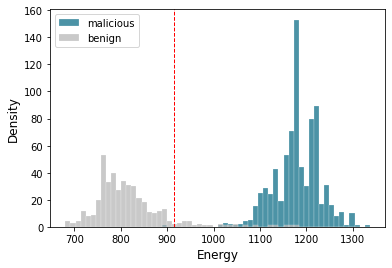

agent18.csv | cutoff = 987.2918571622077 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      6157
           1       0.01      0.01      0.01       282

    accuracy                           0.91      6439
   macro avg       0.48      0.48      0.48      6439
weighted avg       0.91      0.91      0.91      6439



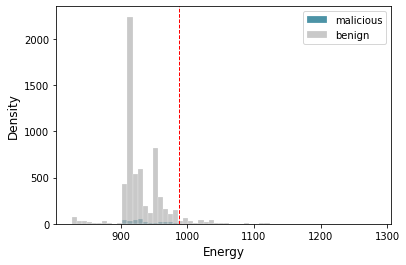

agent4.csv | cutoff = 1008.8109084615999 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      3843
           1       0.87      1.00      0.93      1358

    accuracy                           0.96      5201
   macro avg       0.94      0.97      0.95      5201
weighted avg       0.97      0.96      0.96      5201



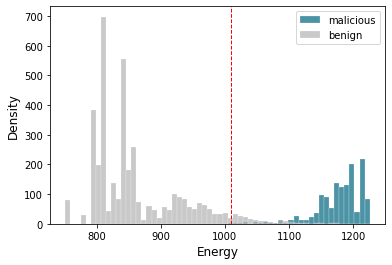

agent13.csv | cutoff = 1033.2807866932833 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.06      0.94      0.11      1109
           1       1.00      0.99      0.99   1292659

    accuracy                           0.99   1293768
   macro avg       0.53      0.96      0.55   1293768
weighted avg       1.00      0.99      0.99   1293768



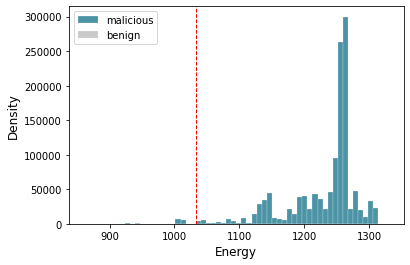

agent5.csv | cutoff = 1031.7048476808554 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    187168
           1       0.74      1.00      0.85     27373

    accuracy                           0.96    214541
   macro avg       0.87      0.97      0.91    214541
weighted avg       0.97      0.96      0.96    214541



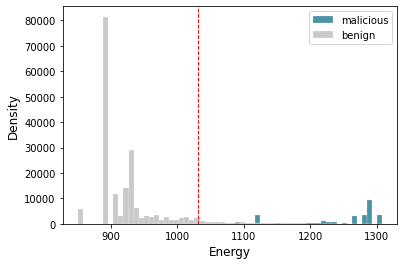

agent14.csv | cutoff = 965.2151847886167 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.06      0.94      0.12      1157
           1       1.00      0.98      0.99    849477

    accuracy                           0.98    850634
   macro avg       0.53      0.96      0.55    850634
weighted avg       1.00      0.98      0.99    850634



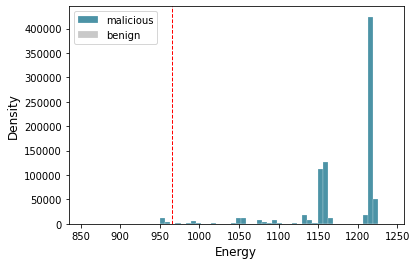

agent8.csv | cutoff = 1029.0818805292956 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     19195
           1       0.89      0.68      0.77     11448

    accuracy                           0.85     30643
   macro avg       0.86      0.82      0.83     30643
weighted avg       0.85      0.85      0.85     30643



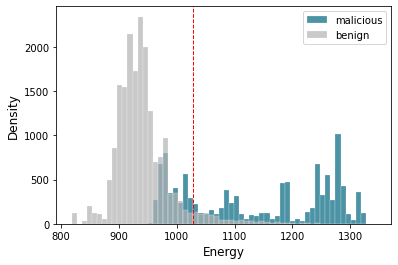

In [16]:
from sklearn.preprocessing import StandardScaler

siloed_efc = {}

for key, silo in silos.items():
    
    X = silo.drop(columns="Label").copy()
    X = preprocess(X)
    y = silo["Label"].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
    )
    
    # EFC already contains MaxAbsScaler
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    # train and test EFC
    clf = EnergyBasedFlowClassifier(cutoff_quantile=0.95)
    clf.fit(X_train, y_train)
    
    siloed_efc[key] = clf
    
    y_pred, y_energies = clf.predict(X_test, return_energies=True)
    
    print(key, "| cutoff =", clf.estimators_[0].cutoff_, "\n-------------------------------------------------------------------\n", classification_report(y_test, y_pred))
    
    # ploting energies
    benign = np.where(y_test == 0)[0]
    malicious = np.where(y_test == 1)[0]

    benign_energies = y_energies[benign]
    malicious_energies = y_energies[malicious]
    cutoff = clf.estimators_[0].cutoff_

    bins = np.histogram(y_energies, bins=60)[1]

    plt.hist(
        malicious_energies,
        bins,
        facecolor="#006680",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="malicious",
    )
    plt.hist(
        benign_energies,
        bins,
        facecolor="#b3b3b3",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="benign",
    )
    plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
    plt.legend()

    plt.xlabel("Energy", fontsize=12)
    plt.ylabel("Density", fontsize=12)

    plt.show()
    
    

# Cross-silo EFC evaluation

In [26]:
data = {}
full = []
avg_info = {} 

for model_key, model in siloed_efc.items():
    for key, silo in silos.items():
        #if model_key == key:
        #    continue
            
        X = silo.drop(columns="Label").copy()
        #X.dropna(inplace=True)
        X = preprocess(X)
        y = silo["Label"].copy()
    
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
        )
        
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        data[key] = score
        print(model_key, "on", key, "--> f1-score =", score)
    
    full.append(data)
    avg_info[model_key] = data
    data = {}

agent16.csv on agent16.csv --> f1-score = 0.15696887686062244
agent16.csv on agent12.csv --> f1-score = 0.9982385989718461
agent16.csv on agent2.csv --> f1-score = 0.0
agent16.csv on agent17.csv --> f1-score = 0.1010222489476849
agent16.csv on agent10.csv --> f1-score = 0.997813287961106
agent16.csv on agent6.csv --> f1-score = 0.4250568287683995
agent16.csv on agent15.csv --> f1-score = 0.9993286677143944
agent16.csv on agent11.csv --> f1-score = 0.9834263849316798
agent16.csv on agent7.csv --> f1-score = 0.00018429499485509804
agent16.csv on agent19.csv --> f1-score = 0.06088682991396426
agent16.csv on agent1.csv --> f1-score = 0.9823377441502782
agent16.csv on agent3.csv --> f1-score = 0.7279295014290251
agent16.csv on agent9.csv --> f1-score = 0.7868525896414342
agent16.csv on agent18.csv --> f1-score = 0.05622489959839357
agent16.csv on agent4.csv --> f1-score = 0.41408751334044824
agent16.csv on agent13.csv --> f1-score = 0.9995712231584343
agent16.csv on agent5.csv --> f1-score 

/home/leohmelo/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


agent2.csv on agent10.csv --> f1-score = 0.0
agent2.csv on agent6.csv --> f1-score = 0.0
agent2.csv on agent15.csv --> f1-score = 0.0
agent2.csv on agent11.csv --> f1-score = 0.0
agent2.csv on agent7.csv --> f1-score = 0.0
agent2.csv on agent19.csv --> f1-score = 0.0
agent2.csv on agent1.csv --> f1-score = 0.0
agent2.csv on agent3.csv --> f1-score = 0.0
agent2.csv on agent9.csv --> f1-score = 0.0
agent2.csv on agent18.csv --> f1-score = 0.0
agent2.csv on agent4.csv --> f1-score = 0.0
agent2.csv on agent13.csv --> f1-score = 0.0
agent2.csv on agent5.csv --> f1-score = 0.0
agent2.csv on agent14.csv --> f1-score = 0.0
agent2.csv on agent8.csv --> f1-score = 0.0
agent17.csv on agent16.csv --> f1-score = 0.1596130592503023
agent17.csv on agent12.csv --> f1-score = 0.9982416133145938
agent17.csv on agent2.csv --> f1-score = 0.0
agent17.csv on agent17.csv --> f1-score = 0.13049645390070921
agent17.csv on agent10.csv --> f1-score = 0.9978148202179037
agent17.csv on agent6.csv --> f1-score = 0.

In [27]:
cross_silo_efc = pd.DataFrame(full, index=list(siloed_efc.keys()))

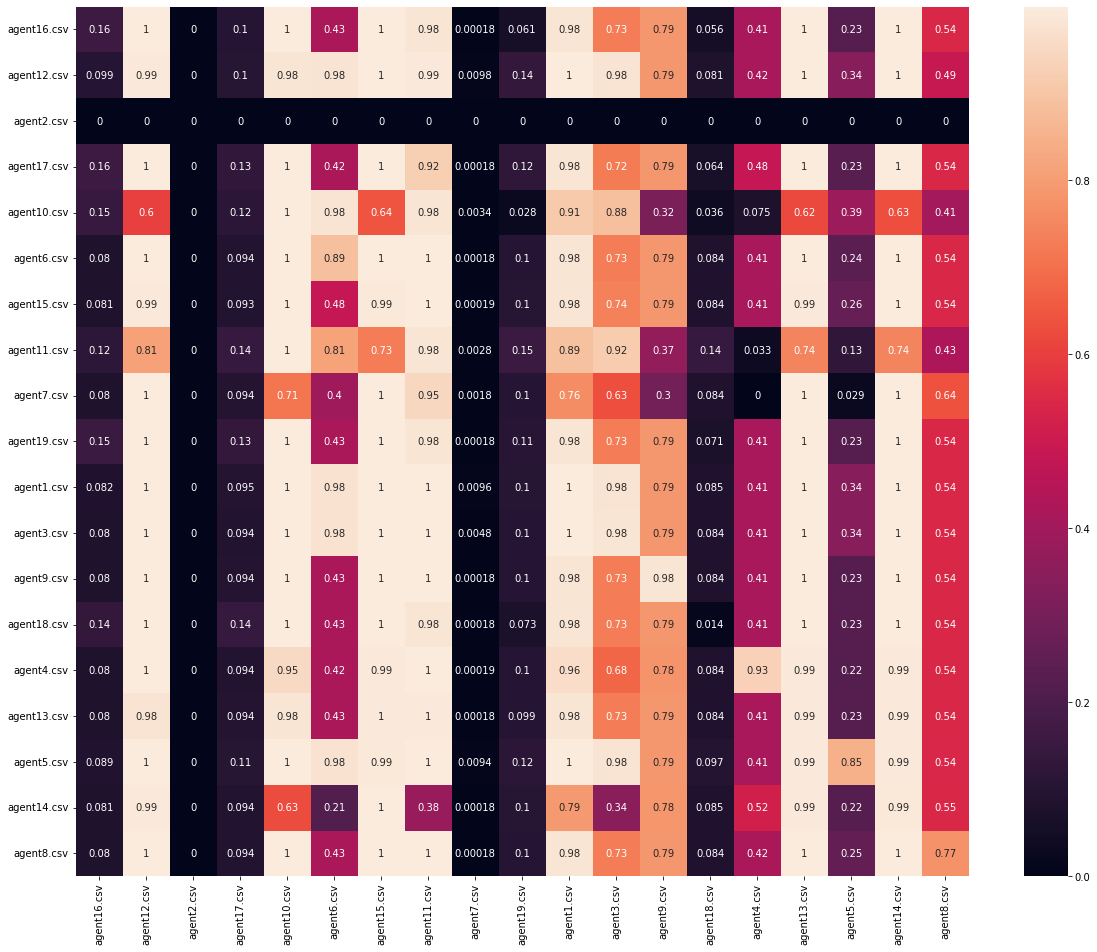

In [28]:
import seaborn as sns
plt.figure(figsize = (20,16))
ax = sns.heatmap(cross_silo_efc, xticklabels=cross_silo_efc.columns, yticklabels=cross_silo_efc.columns, annot=True)

In [29]:
full

[{'agent16.csv': 0.15696887686062244,
  'agent12.csv': 0.9982385989718461,
  'agent2.csv': 0.0,
  'agent17.csv': 0.1010222489476849,
  'agent10.csv': 0.997813287961106,
  'agent6.csv': 0.4250568287683995,
  'agent15.csv': 0.9993286677143944,
  'agent11.csv': 0.9834263849316798,
  'agent7.csv': 0.00018429499485509804,
  'agent19.csv': 0.06088682991396426,
  'agent1.csv': 0.9823377441502782,
  'agent3.csv': 0.7279295014290251,
  'agent9.csv': 0.7868525896414342,
  'agent18.csv': 0.05622489959839357,
  'agent4.csv': 0.41408751334044824,
  'agent13.csv': 0.9995712231584343,
  'agent5.csv': 0.2263035624230098,
  'agent14.csv': 0.9993194562002128,
  'agent8.csv': 0.5439642678957497},
 {'agent16.csv': 0.0991394148020654,
  'agent12.csv': 0.9921474411791544,
  'agent2.csv': 0.0,
  'agent17.csv': 0.10437339213524438,
  'agent10.csv': 0.9806516340860042,
  'agent6.csv': 0.9782314092117678,
  'agent15.csv': 0.9991329973610211,
  'agent11.csv': 0.9926814127487177,
  'agent7.csv': 0.009779951100244

In [25]:
type(full)

list

In [50]:
for i in range(len(avg_info)):
    agent = "agent" + str(i+1) + ".csv"

In [43]:
def average(lst):
    return sum(lst) / len(lst)

In [53]:
# Calculo da média do modelo de cada um dos agentes avaliado em outros datasets
average_f1_score = dict()

for i in range(len(avg_info)):
    name = "agent" + str(i+1) + ".csv"
    average_f1_score[name] = average(avg_info[name].values())

for name, value in average_f1_score.items():
    print(value)

0.6004535955390091
0.0
0.5997295189162565
0.5692745591565163
0.6280522716088655
0.5750219127242926
0.461455949228433
0.5641039105824854
0.5605791879688894
0.461277193401307
0.4813257962876828
0.5989715686328382
0.5473682845294553
0.461255561085435
0.5547292893411518
0.5505008829948178
0.5560266872943478
0.5499178962374074
0.5550790385914939
